<a href="https://colab.research.google.com/github/habibur-rahman-swe/MedicalImageProcessing/blob/udemy/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images
])

In [3]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 120784135.63it/s]


Extracting ../Data/MNIST/raw/train-images-idx3-ubyte.gz to ../Data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 62089028.10it/s]


Extracting ../Data/MNIST/raw/train-labels-idx1-ubyte.gz to ../Data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 49799398.00it/s]


Extracting ../Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14101057.56it/s]

Extracting ../Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/MNIST/raw



In [4]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [7]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [8]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)
    X = X.view(-1, 16*5*5)

    X = torch.flatten(X, 1)

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)

In [9]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
import time
start_time = time.time()

# Variables(trackers)
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# for loop epochs
for i in range(epochs):

  trn_corr = 0
  tst_corr = 0

  # train
  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1

    y_pred = model(X_train) # Not flatten

    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum() # True / False sum()
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (b % 600 == 0):
      print(f"EPOCH: {i} BATCH: {b} LOSS: {loss.item()}")

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # test
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):

      y_val = model(X_test)

      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()


  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()
total = current_time - start_time
print(f"Training took {total / 60} minutes")

EPOCH: 0 BATCH: 600 LOSS: 0.020343977957963943
EPOCH: 0 BATCH: 1200 LOSS: 0.02844063565135002
EPOCH: 0 BATCH: 1800 LOSS: 0.27004510164260864
EPOCH: 0 BATCH: 2400 LOSS: 0.008614985272288322
EPOCH: 0 BATCH: 3000 LOSS: 0.003369278507307172
EPOCH: 0 BATCH: 3600 LOSS: 0.0017438835930079222
EPOCH: 0 BATCH: 4200 LOSS: 0.5683609247207642
EPOCH: 0 BATCH: 4800 LOSS: 0.045028217136859894
EPOCH: 0 BATCH: 5400 LOSS: 0.0014575404347851872
EPOCH: 0 BATCH: 6000 LOSS: 0.012952694669365883
EPOCH: 1 BATCH: 600 LOSS: 0.0010699733393266797
EPOCH: 1 BATCH: 1200 LOSS: 0.07107662409543991
EPOCH: 1 BATCH: 1800 LOSS: 0.00048681447515264153
EPOCH: 1 BATCH: 2400 LOSS: 0.00036020338302478194
EPOCH: 1 BATCH: 3000 LOSS: 0.018994266167283058
EPOCH: 1 BATCH: 3600 LOSS: 4.2351930460426956e-05
EPOCH: 1 BATCH: 4200 LOSS: 0.0002900566905736923
EPOCH: 1 BATCH: 4800 LOSS: 0.004322708584368229
EPOCH: 1 BATCH: 5400 LOSS: 0.00033448883914388716
EPOCH: 1 BATCH: 6000 LOSS: 0.4747803211212158
EPOCH: 2 BATCH: 600 LOSS: 0.000218324

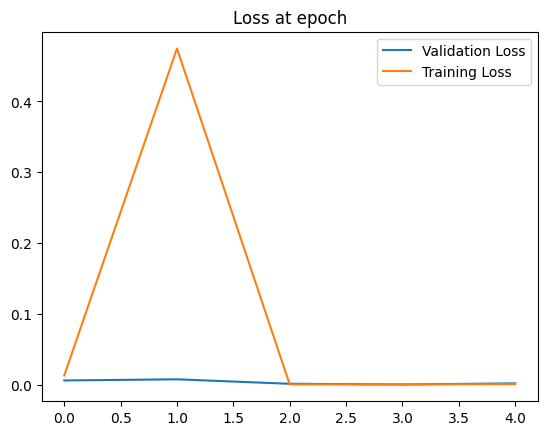

In [12]:
import numpy as np

# Assuming train_losses is a list of PyTorch tensors
train_losses_np = [tensor.detach().numpy() for tensor in train_losses]
test_losses_np = [tensor.detach().numpy() for tensor in test_losses]

plt.plot(test_losses_np, label='Validation Loss')
plt.plot(train_losses_np, label='Training Loss')
plt.title('Loss at epoch')
plt.legend()

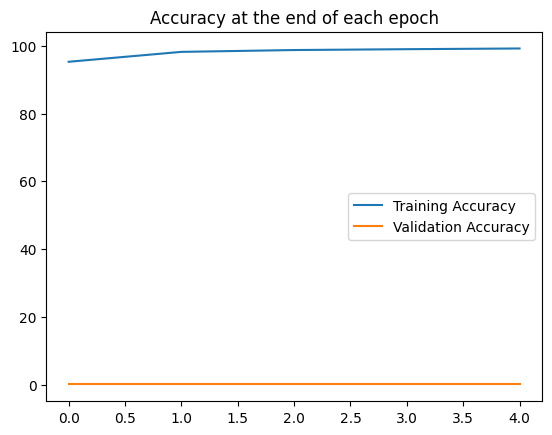

In [13]:
import numpy as np

train_losses_np = [t / 600 for t in train_correct]
test_losses_np = [6 / 100 for t in test_correct]

plt.plot(train_losses_np, label='Training Accuracy')
plt.plot(test_losses_np, label='Validation Accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [14]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [15]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_all:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [16]:
correct.item() / len(test_data)

0.987

In [19]:
np.set_printoptions(formatter=dict(int=lambda x : f'{x:4}'))
print(np.arange(10).reshape(1, 10))
print()

print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 973    0    0    0    0    2    4    0    1    0]
 [   0 1134    1    0    0    0    4    5    0    0]
 [   0    1 1026    2    1    0    1   10    1    0]
 [   0    0    0 1001    0   11    0    0    3    0]
 [   1    0    0    0  979    0    5    2    3   15]
 [   1    0    0    2    0  868    0    0    0    4]
 [   1    0    0    0    1    3  942    0    0    0]
 [   2    0    3    1    0    0    0 1004    0    4]
 [   2    0    2    4    0    8    2    5  963    6]
 [   0    0    0    0    1    0    0    2    3  980]]


In [20]:
torch.__version__

'2.2.1+cu121'